In [2]:
import numpy as np

In [3]:
np.set_printoptions(suppress=True, linewidth=100, precision=2)

In [4]:
loan_data= np.genfromtxt('loan-data.csv', delimiter=';', skip_header=1, autostrip=True)
loan_data

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]])

In [5]:
temp_fill= np.nanmax(loan_data)+1
temp_mean= np.nanmean(loan_data, axis=0)

C:\Users\LANOVO\AppData\Local\Temp\ipykernel_8992\983871117.py:2: RuntimeWarning: Mean of empty slice
  temp_mean= np.nanmean(loan_data, axis=0)


In [6]:
temp_mean

array([54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
            440.92,         nan,         nan,         nan,         nan,         nan,     3143.85])

In [7]:
temp_stats= np.array([np.nanmin(loan_data,axis=0),
                      temp_mean,
                      np.nanmax(loan_data,axis=0)])
temp_stats

C:\Users\LANOVO\AppData\Local\Temp\ipykernel_8992\2431507556.py:1: RuntimeWarning: All-NaN slice encountered
  temp_stats= np.array([np.nanmin(loan_data,axis=0),
C:\Users\LANOVO\AppData\Local\Temp\ipykernel_8992\2431507556.py:3: RuntimeWarning: All-NaN slice encountered
  np.nanmax(loan_data,axis=0)])


array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

In [8]:
column_strings= np.argwhere(np.isnan(temp_mean))
column_strings

array([[ 1],
       [ 3],
       [ 5],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)

In [9]:
column_numeric= np.argwhere(np.isnan(temp_mean)==False)
column_numeric

array([[ 0],
       [ 2],
       [ 4],
       [ 6],
       [ 7],
       [13]], dtype=int64)

In [10]:
column_strings= np.argwhere(np.isnan(temp_mean)).squeeze()
column_strings

array([ 1,  3,  5,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
column_numeric= np.argwhere(np.isnan(temp_mean)==False).squeeze()
column_numeric

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

In [12]:
loan_data_strings= np.genfromtxt('loan-data.csv',
                                 delimiter=';',
                                 skip_header=1,
                                 autostrip=True,
                                 usecols=column_strings,
                                 dtype=str)
loan_data_strings

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [13]:
loan_data_numeric= np.genfromtxt('loan-data.csv',
                                 delimiter=';',
                                 skip_header=1,
                                 autostrip=True,
                                 usecols=column_numeric,
                                filling_values= temp_fill)
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [14]:
header_full= np.genfromtxt('loan-data.csv',
                           delimiter=';',
                           skip_footer= loan_data.shape[0],
                           autostrip=True,
                          dtype=str)
header_full

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

In [15]:
header_strings, header_numeric= header_full[column_strings], header_full[column_numeric]

In [16]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [17]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [18]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header=checkpoint_header, data=checkpoint_data)
    checkpoint_variable= np.load(file_name + '.npz')
    return(checkpoint_variable)

In [19]:
checkpoint_test= checkpoint('checkpoint_test', header_strings, loan_data_strings)

In [20]:
checkpoint_test['header']

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [21]:
checkpoint_test['data']

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [22]:
header_strings[0]= 'issue-date'

In [23]:
loan_data_strings[:,0]

array(['May-15', '', 'Sep-15', ..., 'Jun-15', 'Apr-15', 'Dec-15'], dtype='<U69')

In [24]:
np.chararray.strip(loan_data_strings[:,0], '-15')

chararray(['May', '', 'Sep', ..., 'Jun', 'Apr', 'Dec'], dtype='<U69')

In [25]:
(loan_data_strings[:,0])=np.chararray.strip(loan_data_strings[:,0], '-15')

In [26]:
np.unique(loan_data_strings[:,0])

array(['', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='<U69')

In [27]:
months= np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [28]:
for i in range(13):
    loan_data_strings[:,0]= np.where(loan_data_strings[:,0] == months[i],
                                     i,
                                     loan_data_strings[:,0])

In [29]:
np.unique(loan_data_strings[:,0])

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U69')

In [30]:
np.unique(loan_data_strings[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [31]:
status_bad= np.array([' ', 'Charged Off', 'Late (31-120 days)'])

In [32]:
loan_data_strings[:,1] = np.where(np.isin(loan_data_strings[:,1],status_bad),0,1)

In [33]:
np.unique(loan_data_strings[:,1])

array(['0', '1'], dtype='<U69')

In [34]:
np.unique(loan_data_strings[:,2])

array(['', '36 months', '60 months'], dtype='<U69')

In [35]:
header_strings[2]= 'term_months'

In [36]:
loan_data_strings[:,2]= np.chararray.strip(loan_data_strings[:,2], ' months')

In [37]:
loan_data_strings[:,2]= np.where(loan_data_strings[:,2]=='',
                                 '60',
                                 loan_data_strings[:,2])

In [38]:
np.unique(loan_data_strings[:,2])

array(['36', '60'], dtype='<U69')

In [39]:
np.unique(loan_data_strings[:,3])

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [40]:
np.unique(loan_data_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69')

In [41]:
for i in np.unique(loan_data_strings[:,3])[1:]:
    loan_data_strings[:,4]=np.where((loan_data_strings[:,4]=='') & (loan_data_strings[:,3]==i),
             i+'5',
             loan_data_strings[:,4])

In [42]:
np.unique(loan_data_strings[:,4],return_counts=True)

(array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
        'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
        'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([  9, 285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267,
        250, 255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5],
       dtype=int64))

In [43]:
for i in np.unique(loan_data_strings[:,3])[1:]:
    loan_data_strings[:,4]= np.where((loan_data_strings[:,4]==''),
                                      'H1',
                                      loan_data_strings[:,4])

In [44]:
np.unique(loan_data_strings[:,4])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'H1'], dtype='<U69')

In [45]:
loan_data_strings= np.delete(loan_data_strings, 3, axis=1)

In [46]:
header_strings= np.delete(header_strings, 3)

In [47]:
loan_data_strings[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [48]:
header_strings[3]

'sub_grade'

In [49]:
keys= list(np.unique(loan_data_strings[:,3]))
values= list(range(1, loan_data_strings[:,3].shape[0] +1))
dict_sub_grade= dict(zip(keys,values))

In [50]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [51]:
for i in np.unique(loan_data_strings[:,3]):
    loan_data_strings[:,3]= np.where((loan_data_strings[:,3]==i),
                                      dict_sub_grade[i],
                                      loan_data_strings[:,3])

In [52]:
np.unique(loan_data_strings[:,3])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
       '4', '5', '6', '7', '8', '9'], dtype='<U69')

In [53]:
np.unique(loan_data_strings[:,4])

array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69')

In [54]:
loan_data_strings[:,4]= np.where((loan_data_strings[:,4]== '') | (loan_data_strings[:,4]== 'Not Verified'), 0, 1)

In [55]:
np.unique(loan_data_strings[:,4])

array(['0', '1'], dtype='<U69')

In [56]:
loan_data_strings[:,5]

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249'], dtype='<U69')

In [57]:
loan_data_strings[:,5]= np.chararray.strip(loan_data_strings[:,5], 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=')

In [58]:
loan_data_numeric[:,0]

array([48010226., 57693261., 59432726., ..., 50415990., 46154151., 66055249.])

In [59]:
loan_data_strings[:,5]

array(['48010226', '57693261', '59432726', ..., '50415990', '46154151', '66055249'], dtype='<U69')

In [60]:
loan_data_numeric[:,0].astype(dtype='int32')

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [61]:
loan_data_strings[:,5].astype(dtype='int32')

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [62]:
np.array_equal(loan_data_numeric[:,0].astype(dtype='int32'), loan_data_strings[:,5].astype(dtype='int32'))

True

In [63]:
loan_data_strings= np.delete(loan_data_strings, 5, axis=1)
header_strings= np.delete(header_strings, 5)

In [64]:
np.unique(loan_data_strings[:,5])

array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [65]:
np.unique(loan_data_strings[:,5]).size

50

In [66]:
np.unique(loan_data_strings[:,5], return_counts=True)

(array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
        'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
        'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
        'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69'),
 array([ 500,   26,  119,   74,  220, 1336,  201,  143,   27,   27,  690,  321,   44,  389,  152,
          84,   84,  116,  210,  222,   10,  267,  156,  160,   61,   28,  261,   16,   25,   58,
         341,   57,  130,  777,  312,   83,  108,  320,   40,  107,   24,  143,  758,   74,  242,
          17,  216,  148,   49,   27], dtype=int64))

In [67]:
states_name, states_count= np.unique(loan_data_strings[:,5], return_counts=True)
states_count_sorted= np.argsort(-states_count)
states_name[states_count_sorted], states_count[states_count_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ',
        'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY',
        'KS', 'OK', 'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK',
        'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,
         216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,
          84,   83,   74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,
          25,   24,   17,   16,   10], dtype=int64))

In [68]:
loan_data_strings[:,5]= np.where(loan_data_strings[:,5]=='',
                                 0,
                                 loan_data_strings[:,5])

In [69]:
np.unique(loan_data_strings[:,5])

array(['0', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [70]:
states_west= np.array(['WA','OR','CA','NV','ID','MT','WY','UT','CO','AZ','NM','HI','AK'])
states_south= np.array(['TX','OK','AR','LA','MS','AL','TN','KY','FL','GA','SC','NC','VA','WV','MD','DE','DC'])
states_midwest= np.array(['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'])
states_east= np.array(['PA','NY','NJ','CT','MA','VT','NH','ME','RI'])

In [71]:
loan_data_strings[:,5]= np.where(np.isin(loan_data_strings[:,5], states_west),1, loan_data_strings[:,5])
loan_data_strings[:,5]= np.where(np.isin(loan_data_strings[:,5], states_south),2, loan_data_strings[:,5])
loan_data_strings[:,5]= np.where(np.isin(loan_data_strings[:,5], states_midwest),3, loan_data_strings[:,5])
loan_data_strings[:,5]= np.where(np.isin(loan_data_strings[:,5], states_east),4, loan_data_strings[:,5])

In [72]:
np.unique(loan_data_strings[:,5])

array(['0', '1', '2', '3', '4'], dtype='<U69')

In [73]:
loan_data_strings

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [74]:
loan_data_strings= loan_data_strings.astype(int)

In [75]:
loan_data_strings

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [76]:
checkpoint_strings= checkpoint('checkpoint_strings', header_strings, loan_data_strings)

In [77]:
checkpoint_strings['header']

array(['issue-date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [78]:
checkpoint_strings['data']

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [79]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [80]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [81]:
np.isin(loan_data_numeric[:,0], temp_fill).sum()

0

In [82]:
temp_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

In [83]:
column_numeric

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

In [84]:
temp_stats[:, column_numeric]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

In [85]:
loan_data_numeric[:,2]= np.where(loan_data_numeric[:,2] == temp_fill,
                                 temp_stats[0, column_numeric[2]],
                                 loan_data_numeric[:,2])

In [86]:
for i in [1,3,4,5]:
    loan_data_numeric[:,i]= np.where(loan_data_numeric[:,i] == temp_fill,
                                 temp_stats[2, column_numeric[i]],
                                 loan_data_numeric[:,i])

In [87]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]])

In [88]:
EUR_USD= np.genfromtxt('EUR-USD.csv', delimiter=',', autostrip=True, skip_header=1, usecols=1)
EUR_USD

array([1.21, 1.15, 1.12, 1.12, 1.15, 1.14, 1.12, 1.17, 1.15, 1.15, 1.11, 1.11])

In [89]:
loan_data_strings[:,0]

array([ 5,  0,  9, ...,  6,  4, 12])

In [90]:
exchange_rate= loan_data_strings[:,0]

In [91]:
for i in range(1,13):
    exchange_rate= np.where(exchange_rate==i,
                            EUR_USD[i-1],
                            exchange_rate)

exchange_rate= np.where(exchange_rate==0,
                        np.mean(EUR_USD),
                        exchange_rate)

In [92]:
exchange_rate

array([1.15, 1.14, 1.15, ..., 1.14, 1.12, 1.11])

In [93]:
exchange_rate.shape

(10000,)

In [94]:
loan_data_numeric.shape

(10000, 6)

In [95]:
exchange_rate= exchange_rate.reshape(10000,1)

In [96]:
loan_data_numeric= np.hstack((loan_data_numeric, exchange_rate))

In [97]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  , ...,     1184.86,     9452.96,        1.15],
       [57693261.  ,    30000.  ,    30000.  , ...,      938.57,     4679.7 ,        1.14],
       [59432726.  ,    15000.  ,    15000.  , ...,      494.86,     1969.83,        1.15],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     1372.97,     2185.64,        1.14],
       [46154151.  ,    35000.  ,    10000.  , ...,      354.3 ,     3199.4 ,        1.12],
       [66055249.  ,    10000.  ,    10000.  , ...,      309.97,      301.9 ,        1.11]])

In [98]:
header_numeric= np.concatenate((header_numeric, np.array(['Exchange_Rate'])))

In [99]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'Exchange_Rate'],
      dtype='<U19')

In [100]:
columns_dollar= np.array([1,2,4,5])

In [101]:
for i in columns_dollar:
    loan_data_numeric= np.hstack((loan_data_numeric, np.reshape(loan_data_numeric[:,i] / loan_data_numeric[:,6],(10000,1))))

In [102]:
loan_data_numeric.shape

(10000, 11)

In [103]:
header_additional= np.array([i + '_EUR' for i in header_numeric[columns_dollar]])

In [104]:
header_additional

array(['loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U15')

In [105]:
header_numeric= np.concatenate((header_numeric, header_additional))

In [106]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'Exchange_Rate',
       'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U19')

In [107]:
header_numeric[columns_dollar]= np.array([i+ '_USD' for i in header_numeric[columns_dollar]])

In [108]:
header_numeric

array(['id', 'loan_amnt_USD', 'funded_amnt_USD', 'int_rate', 'installment_USD', 'total_pymnt_USD',
       'Exchange_Rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'],
      dtype='<U19')

In [109]:
seq_list= [0,1,7,2,8,3,4,9,5,10,6]

In [110]:
header_numeric= header_numeric[seq_list] 

In [111]:
header_numeric

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'Exchange_Rate'],
      dtype='<U19')

In [112]:
loan_data_numeric= loan_data_numeric[:, seq_list]

In [113]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    30559.55, ...,     9452.96,     8253.66,        1.15],
       [57693261.  ,    30000.  ,    26284.57, ...,     4679.7 ,     4100.13,        1.14],
       [59432726.  ,    15000.  ,    13089.  , ...,     1969.83,     1718.87,        1.15],
       ...,
       [50415990.  ,    10000.  ,     8750.13, ...,     2185.64,     1912.46,        1.14],
       [46154151.  ,    35000.  ,    31117.77, ...,     3199.4 ,     2844.52,        1.12],
       [66055249.  ,    10000.  ,     9033.42, ...,      301.9 ,      272.72,        1.11]])

In [114]:
header_numeric

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'Exchange_Rate'],
      dtype='<U19')

In [115]:
loan_data_numeric[:, 5]

array([13.33, 28.99, 28.99, ..., 28.99, 16.55, 28.99])

In [116]:
loan_data_numeric[:,5]= loan_data_numeric[:,5]/100

In [117]:
loan_data_numeric[:,5]

array([0.13, 0.29, 0.29, ..., 0.29, 0.17, 0.29])

In [118]:
checkpoint_numeric= checkpoint('checkpoint_numeric', header_numeric, loan_data_numeric)

In [119]:
loan_data_numeric.shape

(10000, 11)

In [120]:
loan_data_strings.shape

(10000, 6)

In [121]:
np.hstack((loan_data_numeric,loan_data_strings))

array([[48010226.  ,    35000.  ,    30559.55, ...,       13.  ,        1.  ,        1.  ],
       [57693261.  ,    30000.  ,    26284.57, ...,        5.  ,        1.  ,        4.  ],
       [59432726.  ,    15000.  ,    13089.  , ...,       10.  ,        1.  ,        4.  ],
       ...,
       [50415990.  ,    10000.  ,     8750.13, ...,        5.  ,        1.  ,        1.  ],
       [46154151.  ,    35000.  ,    31117.77, ...,       17.  ,        1.  ,        3.  ],
       [66055249.  ,    10000.  ,     9033.42, ...,        4.  ,        0.  ,        3.  ]])

In [122]:
np.hstack((loan_data_numeric,loan_data_strings)).shape

(10000, 17)

In [123]:
loan_data= np.hstack((loan_data_numeric,loan_data_strings))

In [124]:
np.concatenate((header_numeric,header_strings))

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'Exchange_Rate',
       'issue-date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [125]:
header_full= np.concatenate((header_numeric,header_strings))

In [126]:
np.sort(loan_data[:,0])

array([  373332.,   575239.,   707689., ..., 68614880., 68615915., 68616519.])

In [127]:
np.argsort(loan_data[:,0])

array([2086, 4812, 2353, ..., 4935, 9388, 8415], dtype=int64)

In [128]:
loan_data= loan_data[np.argsort(loan_data[:,0])]

In [129]:
loan_data

array([[  373332.  ,     9950.  ,     8656.54, ...,       21.  ,        0.  ,        1.  ],
       [  575239.  ,    12000.  ,    10440.05, ...,       25.  ,        1.  ,        2.  ],
       [  707689.  ,    10000.  ,     8707.62, ...,       13.  ,        1.  ,        0.  ],
       ...,
       [68614880.  ,     5600.  ,     5058.72, ...,        8.  ,        1.  ,        1.  ],
       [68615915.  ,     4000.  ,     3613.37, ...,       10.  ,        1.  ,        2.  ],
       [68616519.  ,    21600.  ,    19512.19, ...,        3.  ,        0.  ,        2.  ]])

In [130]:
loan_data=np.vstack((header_full,loan_data))

In [131]:
loan_data

array([['id', 'loan_amnt_USD', 'loan_amnt_EUR', ..., 'sub_grade', 'verification_status',
        'addr_state'],
       ['373332.0', '9950.0', '8656.539647132546', ..., '21.0', '0.0', '1.0'],
       ['575239.0', '12000.0', '10440.04781563724', ..., '25.0', '1.0', '2.0'],
       ...,
       ['68614880.0', '5600.0', '5058.715105318186', ..., '8.0', '1.0', '1.0'],
       ['68615915.0', '4000.0', '3613.3679323701326', ..., '10.0', '1.0', '2.0'],
       ['68616519.0', '21600.0', '19512.18683479872', ..., '3.0', '0.0', '2.0']], dtype='<U32')

In [132]:
np.savetxt('loan_preprocessed.csv',
           loan_data,
           fmt= '%s',
           delimiter=',')

In [133]:
header_full

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'Exchange_Rate',
       'issue-date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [134]:
import pandas as pd

In [135]:
df= pd.read_csv('loan_preprocessed.csv')
df

,id,loan_amnt_USD,loan_amnt_EUR,funded_amnt_USD,funded_amnt_EUR,int_rate,installment_USD,installment_EUR,total_pymnt_USD,total_pymnt_EUR,Exchange_Rate,issue-date,loan_status,term_months,sub_grade,verification_status,addr_state
0,373332.0,9950.0,8656.539647,1000.0,870.003985,0.1825,360.97,314.045338,1072.82,933.357675,1.149420,10.0,1.0,36.0,21.0,0.0,1.0
1,575239.0,12000.0,10440.047816,12000.0,10440.047816,0.2099,324.58,282.385893,959.75,834.986324,1.149420,10.0,1.0,60.0,25.0,1.0,2.0
2,707689.0,10000.0,8707.619476,10000.0,8707.619476,0.1366,340.13,296.172261,3726.25,3244.676707,1.148419,2.0,1.0,36.0,13.0,1.0,0.0
3,709828.0,27200.0,23664.108382,27200.0,23664.108382,0.2899,553.87,481.869107,41913.62,36465.016411,1.149420,10.0,1.0,60.0,6.0,0.0,4.0
4,849994.0,11400.0,10141.987761,11400.0,10141.987761,0.2899,376.09,334.587735,3753.60,3339.382918,1.124040,3.0,1.0,36.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,68603178.0,14000.0,12646.787763,14000.0,12646.787763,0.2899,421.61,380.858013,41913.62,37862.332609,1.107000,12.0,1.0,36.0,1.0,0.0,1.0
9996,68604253.0,20000.0,18066.839662,20000.0,18066.839662,0.2899,631.26,570.243660,0.00,0.000000,1.107000,12.0,1.0,36.0,6.0,0.0,2.0
9997,68614880.0,5600.0,5058.715105,5600.0,5058.715105,0.2899,180.18,162.764159,0.00,0.000000,1.107000,12.0,1.0,36.0,8.0,1.0,1.0
9998,68615915.0,4000.0,3613.367932,4000.0,3613.367932,0.2899,131.87,119.123707,0.00,0.000000,1.107000,12.0,1.0,36.0,10.0,1.0,2.0


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

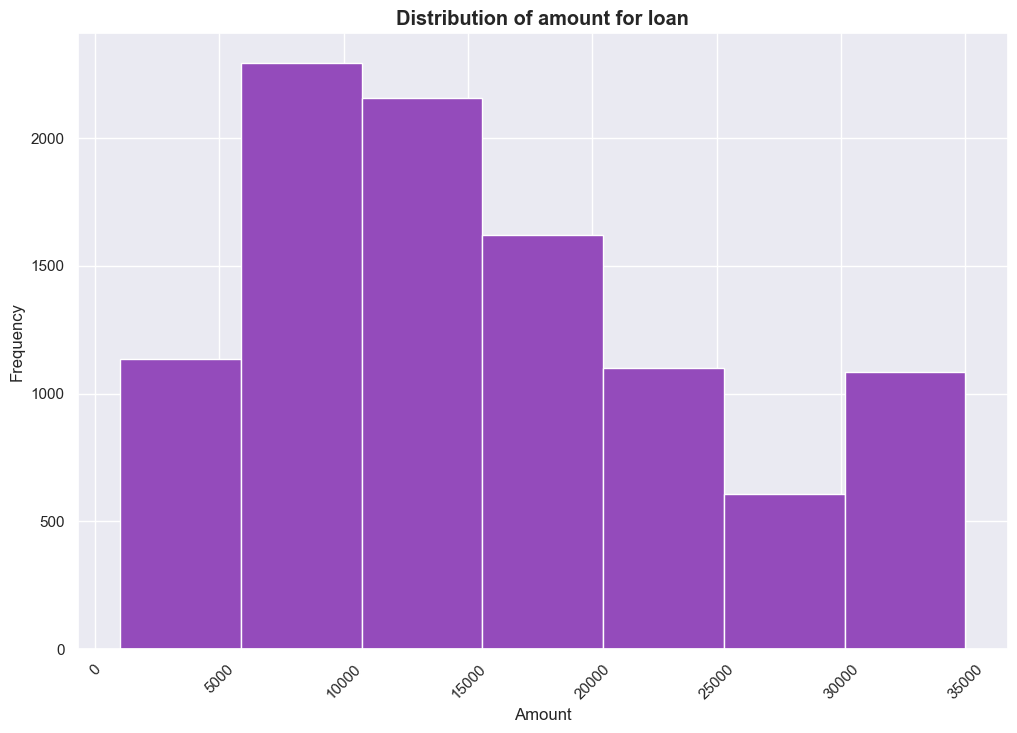

In [137]:
plt.figure(figsize=(12,8))
plt.hist(df['loan_amnt_USD'],
         bins=7,
         color= '#944BBB')
plt.title('Distribution of amount for loan', fontsize= 'large', weight= 'bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [309]:
unique_elements, counts = np.unique(loan_data_strings[:, 5], return_counts=True)

In [311]:
print(counts)

[ 500 2467 3384 1733 1916]


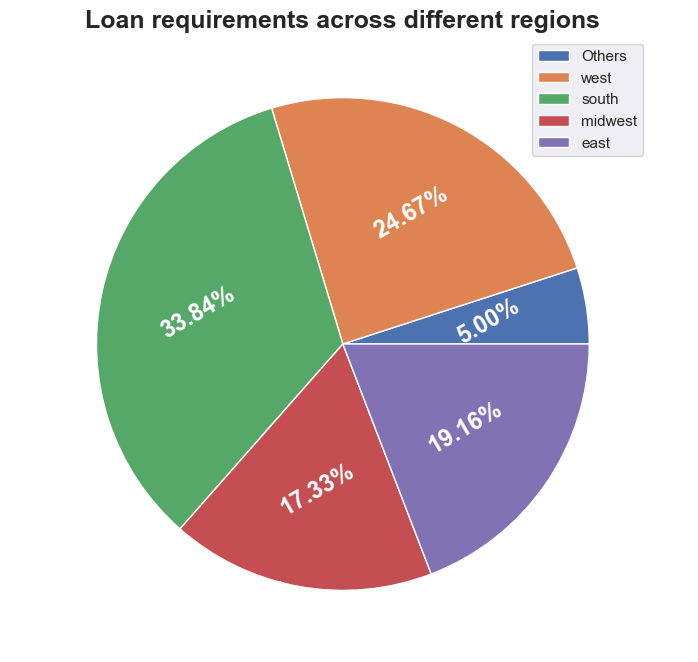

In [321]:
labels= ['Others', 'west', 'south', 'midwest', 'east']
plt.figure(figsize=(10,8))
plt.pie(counts,
        labels=labels,
        autopct= '%.2f%%',
        textprops= {'size': 'x-large', 
                    'fontweight': 'bold',
                    'color': 'w',
                    'rotation':30})
plt.title('Loan requirements across different regions', fontsize= 18, fontweight= 'bold')
plt.legend()
plt.show()